In [33]:
# Source:
# http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [34]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# the datasets copy hosted at github repository
df = pd.read_csv('https://raw.githubusercontent.com/kefeimo/Thinkful_DataScience/master/module15%20experimental%20design/WA_Fn-UseC_-HR-Employee-Attrition.csv')

df.info()
df.head()

# As a starter, we are only interested in attrition values and years at company value
# effected by gender for this analysis

# Count records by gender
print(df['Attrition'].groupby(df['Gender']).agg(['count']))
print()
# convert "Yes" and "No" in Attrition to "1" and "0" in Attribution_num
df['Attrition_num'] = df['Attrition'].map(dict(Yes=1, No=0))
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,80,3,12,3,2,1,0,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,80,1,1,2,3,1,0,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,80,0,10,2,3,9,7,1,8,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,80,2,17,3,2,7,7,7,7,0


# Are Male Employees More Likely To Quit?
#          -- Analysis Attrition Rate in Our Company
## Kefei Mo
## XX XX, 2020

# Why you care about this analysis?

<center><img src="./res/why am i here.jpg" width="300"></center>



In [41]:
![title](img/picture.png)

SyntaxError: invalid syntax (<ipython-input-41-c9ea50468573>, line 1)

# Because attribution can be a big problem.
- HRs: most of the time spending on job selection process

- Department managers/ Team leaders: lose talants, skillful workers

- Team workers: miss link in a chain to as a team

# Attrition in Our Company
- Attrition rate in our company is over 10% red line. What's the casue?

- History records showed that male empolyees are more likely to quit? But is it TRUE?!

- Is education a main factor on attrition rate? Here is what a data scientist will tell you.

# Question #1: “Are male employees at the company more likely to quit the job?”

# History Records

,count
Gender,
Female,588
Male,882


,Attrition_rate
Gender,
Female,0.147959
Male,0.170068


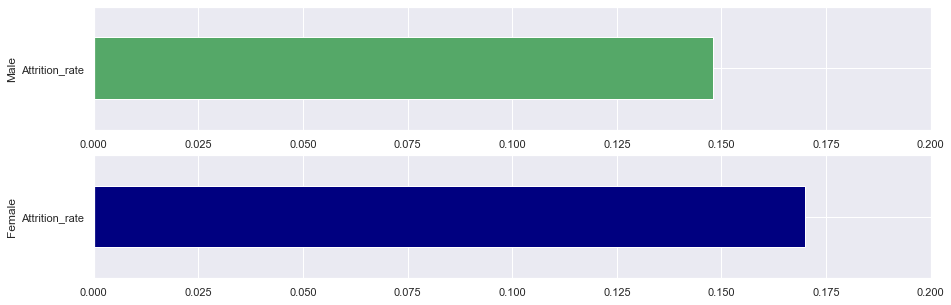

In [35]:
# Count records by gender
# print(df['Attrition'].groupby(df['Gender']).agg(['count']))
display(df['Attrition'].groupby(df['Gender']).agg(['count']))

# convert "Yes" and "No" in Attrition to "1" and "0" in Attribution_num
df['Attrition_rate'] = df['Attrition'].map(dict(Yes=1, No=0))
# df.head(10)

# Compare attrition rate by gender
df_sorted = df.groupby(df['Gender'])[['Attrition_rate']].agg(np.average).reset_index().sort_values('Attrition_rate')

# type(df_sorted)
# df_sorted.info()
# df_sorted.head()

# df_sorted

display(df.groupby(df['Gender'])[['Attrition_rate']].agg(np.average))

fig, ax = plt.subplots(2, 1, figsize=(15, 5))

df[df.Gender=="Female"][['Gender','Attrition_rate']].mean().plot(kind='barh', ax=ax[0],color='g')
df[df.Gender=="Male"][['Gender','Attrition_rate']].mean().plot(kind='barh', ax=ax[1],color='navy')
for _ in ax:
    _.set_xlim([0,0.2])
ax[0].set_ylabel('Male')
ax[1].set_ylabel('Female')
plt.show()

- Is there a statisticaly significant difference between Male attrition rate VS. Female attrition rate?

# No:

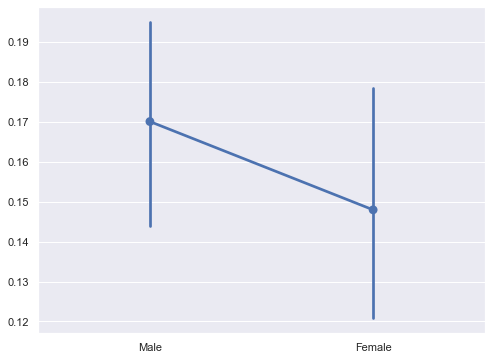

In [36]:
import seaborn as sns

# Set figure size
sns.set(rc={'figure.figsize':(8,6)})

# usa_sales = sales[(sales['Gender'] == 'Male')]
# uk_canada_sales = sales[sales['country'].isin(['UK', 'Canada','Australia'])]

g = sns.pointplot(data=[df[df.Gender == 'Male']['Attrition_rate'],
                        df[df.Gender == 'Female']['Attrition_rate']], join=True)
                        
# Adding a semicolon means output won't render in 
g.set(xticklabels = ['Male', 'Female']);

- What am I looking at?
- But wait a minute! What the heck does "statistically significant difference" even mean?
- Why this plot has anything to do with "statistically significantly differnece"?
<center><img src="./res/w7cyf.jpg" width="300"></center>


In [37]:
# get 95% confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df[df.Gender == 'Female']['Attrition_num'], df[df.Gender == 'Male']['Attrition_num'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.01584513934587179 and 0.060062826420701716.'

### With 95% confidence, the average difference of attrition rate between male and female employees is in the range of (-0.0158 , 0.0600).

# Question #2: Do male employees stay less years at the company?

# No:

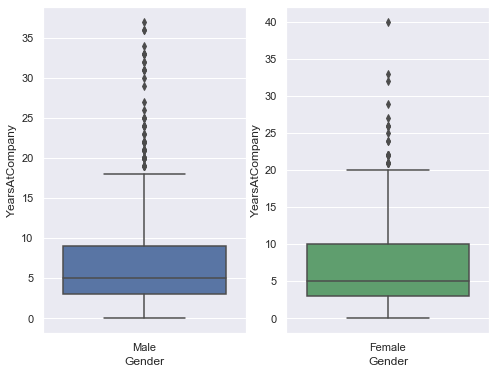

In [38]:
# boxplot
# Since the distribution is non-normal, it is better to visualize using 
# boxplot or voilinplot
sns.set(rc={'figure.figsize':(8,6)})
f, axes = plt.subplots(1, 2)
sns.boxplot(y='YearsAtCompany', x='Gender', data=df[df.Gender == 'Male'][['Gender','YearsAtCompany']], color='b',ax=axes[0])
sns.boxplot(y='YearsAtCompany', x='Gender', data=df[df.Gender == 'Female'][['Gender','YearsAtCompany']], color='g',ax=axes[1])
plt.show()

# Question #3: Do employees of different dducation level have very different attrition rate? If so, which one stands out?

# NO

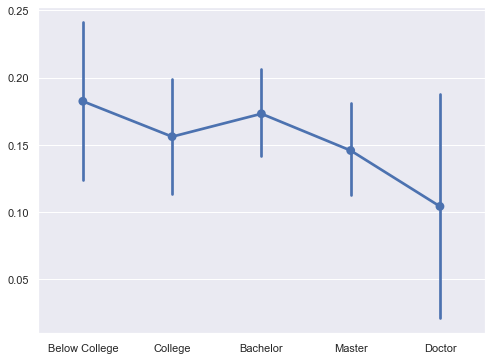

In [39]:
# Data Preparation and Visualization 
# using pointplot
sns.set(rc={'figure.figsize':(8,6)})

g = sns.pointplot(data=[df[df.Education == 1]['Attrition_num'],
                        df[df.Education == 2]['Attrition_num'],
                      df[df.Education == 3]['Attrition_num'],
                      df[df.Education == 4]['Attrition_num'],
                      df[df.Education == 5]['Attrition_num']], join=True)
                        
# 1. Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor
g.set(xticklabels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']);


# Question #4: Do employees of different education level will tell us the year they would stay at the company?

# NO

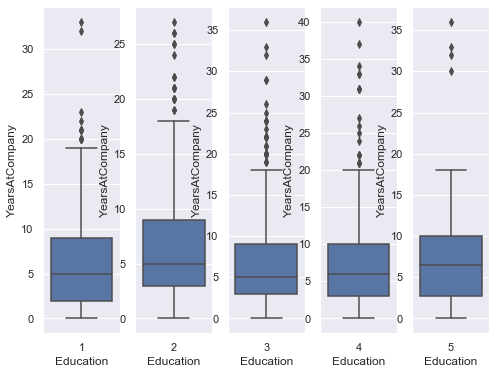

In [40]:
# boxplot
# Since the distribution is non-normal, it is better to visualize using 
# boxplot or voilinplot

f, axes = plt.subplots(1, 5)
for index in range(len(axes)):
    sns.boxplot(y='YearsAtCompany', x='Education', data=df[df.Education == index+1][['Education','YearsAtCompany']], color='b',ax=axes[index])

# What We Learnt?
- Male employees are NOT significantly more likely to quit. (At least there is no statistic proof.)


- Should be no discrimination based on gender by assuming one group has higher attrition rate.

- Then what makes the "significantly difference"? We need to study other factors, or use other tools.

# Questions?

# Takeaways
- Started our study with gender, why?
- Gender factor is a hot topic, but sometimes sensitive
- Gender data is easy to measure and hard to get wrong :)
- Similar analysis can be applied to other factors, i.e. age, education level...